In [1]:
# excuetd in Google Colab

# download xarray's sample data (ERA-Interium)
import xarray as xr
ds = xr.tutorial.load_dataset('eraint_uvz')

# select January and 500 hPa
ds_1_500 = ds.sel(month=1, level=500)

print(ds_1_500)

<xarray.Dataset>
Dimensions:    (longitude: 480, latitude: 241)
Coordinates:
  * longitude  (longitude) float32 -180.0 -179.2 -178.5 ... 177.8 178.5 179.2
  * latitude   (latitude) float32 90.0 89.25 88.5 87.75 ... -88.5 -89.25 -90.0
    level      int32 500
    month      int32 1
Data variables:
    z          (latitude, longitude) float64 4.972e+04 4.972e+04 ... 5.037e+04
    u          (latitude, longitude) float64 1.922 1.906 1.89 ... -1.172 -1.203
    v          (latitude, longitude) float64 -1.078 -1.109 ... 2.547 2.539
Attributes:
    Conventions:  CF-1.0
    Info:         Monthly ERA-Interim data. Downloaded and edited by fabien.m...


In [2]:
# download the package
!pip install git+https://gitlab.com/kasugab3621/finitediffs.git

# D for a scalr
from finitediffs import D

# D consumes xr.DataArray
# gradient, laplacian, dx/dy/dz/dt (longitude/latitude/vertical/temporal derivatives) can be used
b = D(ds_1_500.z)
zx, zy = b.gradient()

# UV for a vector
from finitediffs import UV

# UV consumes 2 DataArrays in this order of (u, v),
# vorticity, absolute_vorticity, divergence can be used
a = UV(ds_1_500.u, ds_1_500.v)
vor = a.absolute_vorticity()

  Cloning https://gitlab.com/kasugab3621/finitediffs.git to /tmp/pip-req-build-x_gt55ne
  Running command git clone --filter=blob:none --quiet https://gitlab.com/kasugab3621/finitediffs.git /tmp/pip-req-build-x_gt55ne
  Resolved https://gitlab.com/kasugab3621/finitediffs.git to commit 5699e5d52801c0a2a8660df84cdf2d92d201aade
  Preparing metadata (setup.py) ... done
  Created wheel for finitdiffs: filename=finitdiffs-0.2.0-py3-none-any.whl size=4309 sha256=08089051dee75049baa7998f602c77068b3ffe642ca69939d5a7813098082d58
  Stored in directory: /tmp/pip-ephem-wheel-cache-n781k6u_/wheels/e1/b5/c9/36e634bcabb6346d43151abe6570977d32749578ae4103bccc
Successfully built finitdiffs


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 30.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 3.5 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


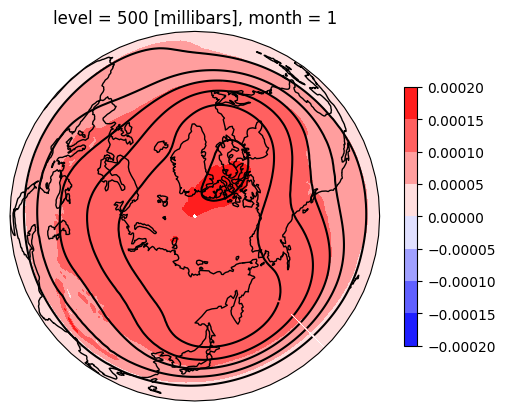

In [3]:
# for drawing coastlines
!pip install cartopy

# sample plot using matplotlib and cartopy
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
ax = plt.axes(projection=ccrs.Orthographic(135, 90))
ax.coastlines()
p = ds_1_500.z.plot.contour(ax=ax, colors='k', transform=ccrs.PlateCarree())
# plot calculated absolute vorticity
s = ax.contourf(a.lons, a.lats, vor, cmap='bwr', transform=ccrs.PlateCarree())
plt.colorbar(s, shrink=0.7)